# Figure 2A

In [1]:
# required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    #plt.title('The model fits the switchpoint', y=1.1, size=65)
    exp_time = [4, 6, 8]
    exp_sp = [-800, -640, -280]
    exp_err = [-130, -140, -187]

    # Experimental switchpoint
    ax.errorbar(exp_time , exp_sp, yerr=exp_err, color='black',ecolor='black', fmt='o',markersize=11,elinewidth=3, label='Experimental switchpoint')
    
    ax.legend(loc='upper left', facecolor='white')
    plt.xlabel('Time (days)')
    plt.ylabel('AP Position' + ' (' + r'$\mu$'+'m)')
    plt.xlim(0,8.2)  
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 42})
    filename = "./" + "Fig_2A.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight')

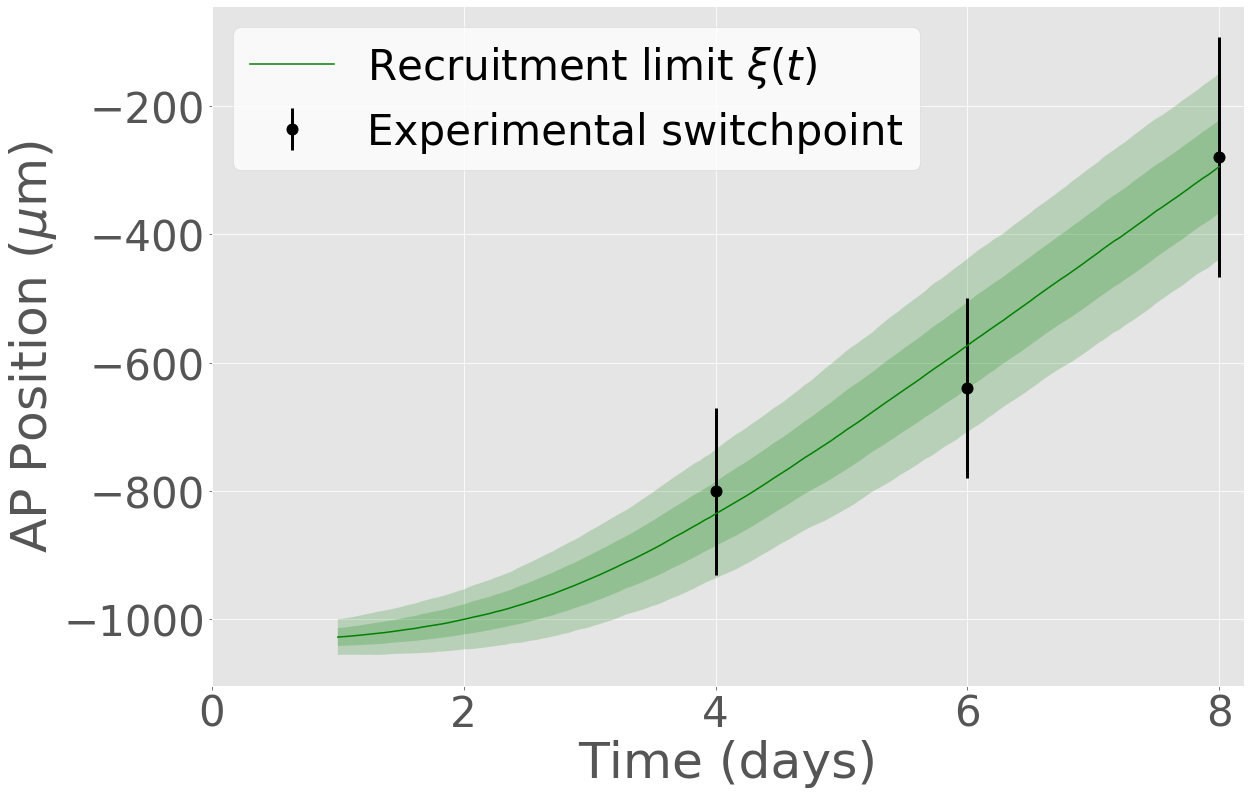

In [4]:
n0 = 200
l = -1050
tau = 24

root = '../main/simulations/switchpoint/'
parameters_set = "n0="+str(n0)+"_l="+str(l)+"_tau="+str(tau)

df_all = []
files = os.listdir(root+parameters_set)
ordered_files = sorted(files)
for seed in ordered_files:    
    opened_file = open(root+parameters_set+"/"+seed)
    df0 = pd.read_csv(opened_file, delimiter=',')
    outgrowth = df0['outgrowth']*13.2
    df_all.append(outgrowth)
df_all = pd.concat(df_all, ignore_index=True, axis=1)
df_mean = np.asarray(df_all.mean(axis=1))
df_std = np.asarray(df_all.std(axis=1))
time = df0['time']/24

df_all = df_all[tau:]
df_mean = df_mean[tau:]
df_std = df_std[tau:]
time = time[tau:]


# Model simulations
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, df_mean, color='g', label='Recruitment limit '+r'$\xi(t)$')
ax.fill_between(time, df_mean-df_std, df_mean+df_std, facecolor='g', alpha=0.2)
ax.fill_between(time, df_mean-2*df_std, df_mean+2*df_std, where=(df_mean-2*df_std)<(df_mean-df_std), facecolor='g', alpha=0.2)
#ax.fill_between(time, df_mean-3*df_std, df_mean+3*df_std, facecolor='g', alpha=0.2)

plot_create()